# 서울시 구별 CCTV 현황 분석하기
- - -

## 1. 데이터 불러오기
  
### 1-1. 서울시 구별 CCTV 보유 현황

In [1]:
import pandas as pd
import numpy as np

In [2]:
cctv_seoul = pd.read_csv('data/01. CCTV_in_Seoul.csv', encoding = 'utf-8')
cctv_seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [3]:
cctv_seoul.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [4]:
cctv_seoul.rename(columns = {cctv_seoul.columns[0] : '구별'}, inplace=True)
cctv_seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


    → 컬럼명 변경, 딕셔너리 형태로 지정

### 1-2. 서울시 구별 인구 현황

In [5]:
pop_seoul = pd.read_excel('data/01. population_in_Seoul.xls')
pop_seoul.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017.1/4,합계,4202888,10197604,5000005,5197599,9926968,4871560,5055408,270636,128445,142191,2.36,1321458
3,2017.1/4,종로구,72654,162820,79675,83145,153589,75611,77978,9231,4064,5167,2.11,25425
4,2017.1/4,중구,59481,133240,65790,67450,124312,61656,62656,8928,4134,4794,2.09,20764


In [6]:
pop_seoul = pd.read_excel('data/01. population_in_Seoul.xls',
                         header = 2,                           # 3번째 row부터
                         usecols = 'B, D, G, J, N')            # 
pop_seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


Ref. `pd.read_excel` 
```
usecols : int, str, list-like, or callable default None
    * If None, then parse all columns.
    * If str, then indicates comma separated list of Excel column letters
      and column ranges (e.g. "A:E" or "A,C,E:F"). Ranges are inclusive of
      both sides.
    * If list of int, then indicates list of column numbers to be parsed.
    * If list of string, then indicates list of column names to be parsed.
```

In [7]:
pop_seoul.rename(columns = { 
    pop_seoul.columns[0] : '구별',
    pop_seoul.columns[1] : '인구수',
    pop_seoul.columns[2] : '한국인',
    pop_seoul.columns[3] : '외국인',
    pop_seoul.columns[4] : '고령자'
}, inplace = True)

# or
pop_seoul.columns = ['구별', '인구수', '한국인', '외국인', '고령자']
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


- - -

## 2. 데이터 파악하기

### 2-1. CCTV 데이터

In [8]:
cctv_seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [9]:
cctv_seoul.sort_values(by = '소계', ascending = True).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,485,238,159,42,386
12,마포구,574,314,118,169,379
17,송파구,618,529,21,68,463
24,중랑구,660,509,121,177,109
23,중구,671,413,190,72,348


In [10]:
cctv_seoul.sort_values(by = '소계', ascending = True).tail()

,구별,소계,2013년도 이전,2014년,2015년,2016년
20,용산구,1624,1368,218,112,398
21,은평구,1873,1138,224,278,468
14,서초구,1930,1406,157,336,398
18,양천구,2034,1843,142,30,467
0,강남구,2780,1292,430,584,932


In [11]:
cctv_seoul['최근증가율'] = \
    ( cctv_seoul['2016년'] + cctv_seoul['2015년'] + cctv_seoul['2014년'] ) \
    / cctv_seoul['2013년도 이전'] * 100

cctv_seoul.sort_values(by = '최근증가율', ascending = False).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765


### 2-2. 인구 데이터

In [12]:
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [13]:
pop_seoul.drop(index = [0], inplace = True)
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [14]:
pop_seoul['구별'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', nan],
      dtype=object)

    → 값 없는 행 존재

In [15]:
pop_seoul[pop_seoul['구별'].isnull()]

,구별,인구수,한국인,외국인,고령자
26,NaN,NaN,NaN,NaN,NaN


In [16]:
pop_seoul.drop(index = [26], inplace = True)

In [17]:
pop_seoul['외국인비율'] = pop_seoul['외국인'] / pop_seoul['인구수'] * 100
pop_seoul['고령자비율'] = pop_seoul['고령자'] / pop_seoul['인구수'] * 100
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


Q1. 인구수가 가장 많은 자치구 TOP 5

    : 중구, 종로구, 용산구, 금천구, 성동구

In [18]:
pop_seoul.sort_values(by = '인구수', ascending = True).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689


Q2. 외국인 비율이 가장 높은 자치구 Top 5

    : 도봉구, 노원구, 양천구, 강남구, 은평구

In [19]:
pop_seoul.sort_values(by = '외국인비율', ascending = True).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
10,도봉구,348646.0,346629.0,2017.0,51312.0,0.578524,14.717507
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
15,양천구,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964
23,강남구,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
12,은평구,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019


Q3. 고령자 비율이 가장 높은 자치구 Top 5

    : 송파구, 양천구, 강남구, 광진구, 서초구

In [20]:
pop_seoul.sort_values(by = '고령자비율', ascending = True).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
15,양천구,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964
23,강남구,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849
22,서초구,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308


- - -

## 3. CCTV 데이터와 인구 데이터 병합하고 분석하기

In [21]:
data = pd.merge(cctv_seoul, pop_seoul, on = '구별') # join

data.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [22]:
data.drop(columns = ['2013년도 이전', '2014년', '2015년', '2016년'], inplace = True)
data.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [23]:
data.set_index('구별', inplace = True)
data.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [24]:
np.corrcoef(data['고령자비율'], data['소계'])

array([[ 1.        , -0.28078554],
       [-0.28078554,  1.        ]])

    → CCTV 수와 고령자비율의 상관계수는 약 -0.28

In [25]:
np.corrcoef(data['외국인비율'], data['소계'])

array([[ 1.        , -0.13607433],
       [-0.13607433,  1.        ]])

    → CCTV 수와 외국인비율의 상관계수는 약 -0.13

- - -

## 4. CCTV와 인구 현황 그래프로 분석하기

In [26]:
import platform
import matplotlib.pyplot as plt 

from matplotlib import font_manager, rc

In [27]:
plt.rcParams['axes.unicode_minus'] = False

path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname = path).get_name()
rc('font', family = font_name)

In [28]:
data.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


### 4-1. 구별 CCTV 보유 현황
  
- **가로 막대 그래프** : `plt.plot(x, kind = 'barh')`

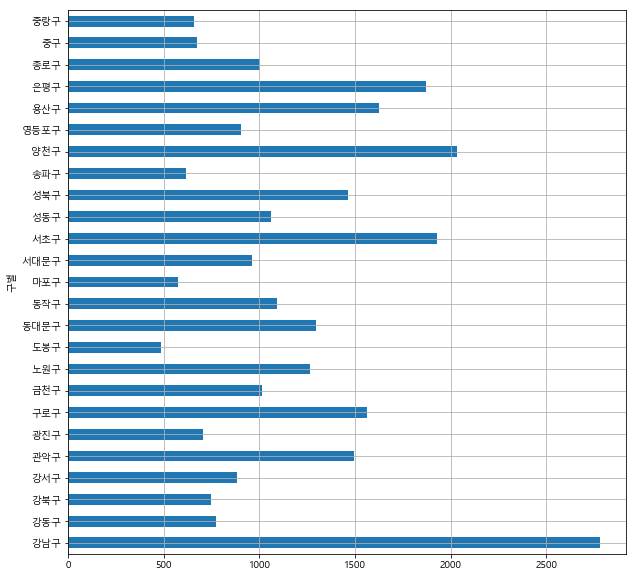

In [29]:
plt.figure()

data['소계'].plot(kind = 'barh', grid = True, figsize = (10, 10))
plt.show()

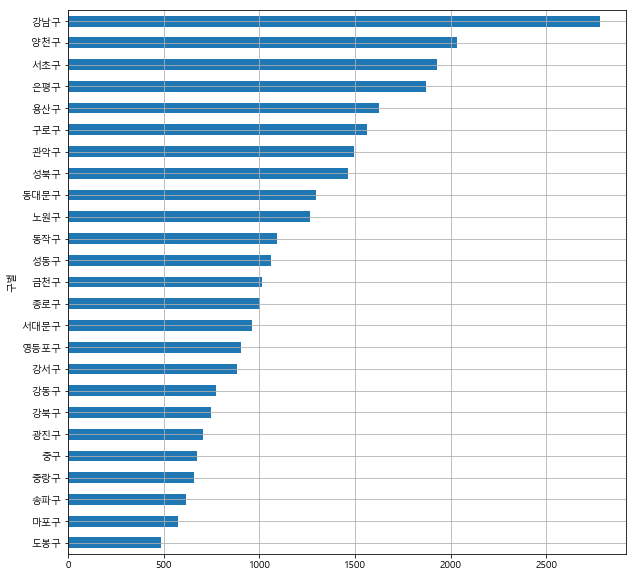

In [30]:
data['소계'].sort_values().plot(kind = 'barh', grid = True, figsize = (10, 10))
plt.show()

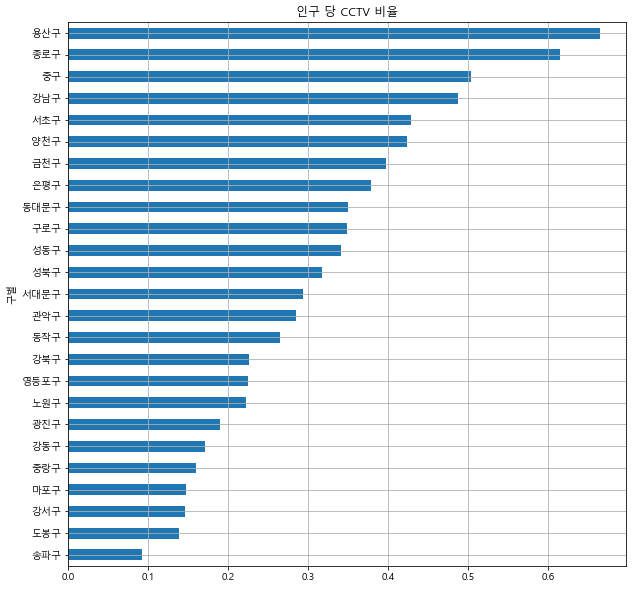

In [31]:
data['CCTV비율'] = data['소계'] / data['인구수'] * 100

data['CCTV비율'].sort_values().plot(kind = 'barh', grid = True, figsize = (10, 10))
plt.title('인구 당 CCTV 비율')
plt.show()

* **산점도** : `plt.scatter(x, y)`

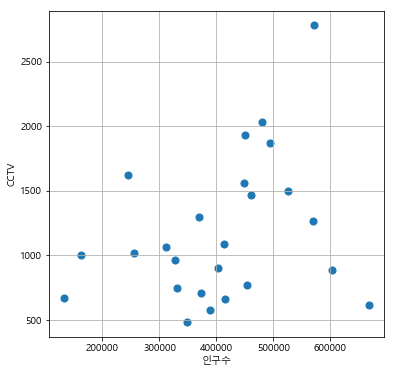

In [32]:
plt.figure(figsize = (6, 6))

plt.scatter(data['인구수'], data['소계'], s = 50)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

* **회귀선 추가**  
  
  
    - `np.polyfit` : Least squares polynomial fit (degree 지정)
    - `np.poly1d` : A one-dimensional polynomial class → f(x) 식으로 함수로 사용 가능

In [33]:
fp1 = np.polyfit(data['인구수'], data['소계'], deg = 1)
fp1

array([1.30916415e-03, 6.45066497e+02])

    → $$\hat{y} = 0.0013 + 645.07 * x$$

In [34]:
f1 = np.poly1d(fp1)
f1

poly1d([1.30916415e-03, 6.45066497e+02])

In [35]:
fx = np.linspace(100000, 700000, 100) # seq(from, to, by)

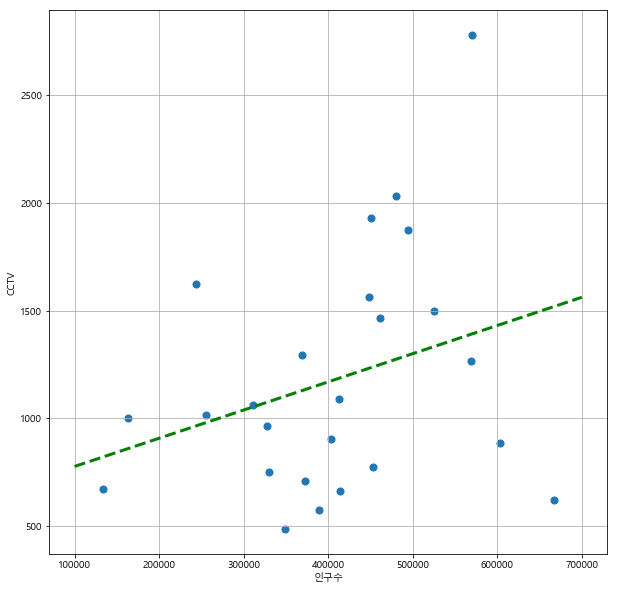

In [36]:
plt.figure(figsize = (10, 10))

plt.scatter(data['인구수'], data['소계'], s = 50)
plt.plot(fx, f1(fx), ls = 'dashed', lw = 3, color = 'g') # line
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

* **자료 설명 추가**

In [37]:
data['오차'] = np.abs(data['소계'] - f1(data['인구수'])) # 절대값 오차

In [38]:
data_sort = data.sort_values(by = '오차', ascending = False)
data_sort.head(10)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.487292,1388.055355
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599,0.092587,900.911312
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964,0.423769,760.563512
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308,0.428594,695.403794
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,0.665020,659.231690
도봉구,485,246.638655,348646.0,346629.0,2017.0,51312.0,0.578524,14.717507,0.139110,616.501341
마포구,574,212.101911,389649.0,378566.0,11083.0,48765.0,2.844355,12.515110,0.147312,581.180999
은평구,1873,85.237258,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019,0.378852,580.698457
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,0.146413,551.503155


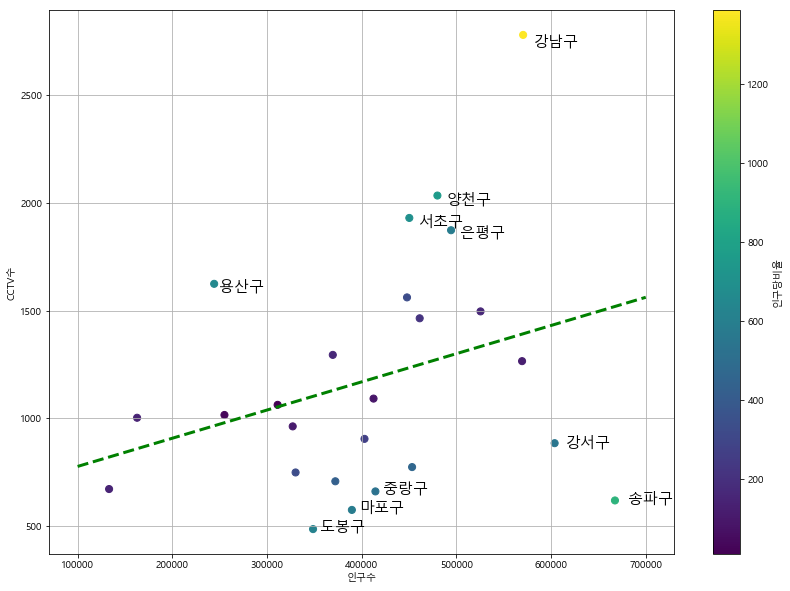

In [39]:
plt.figure(figsize = (14, 10))

# 오차로 색 변경
plt.scatter(data['인구수'], data['소계'], c = data['오차'], s = 50)
plt.plot(fx, f1(fx), ls = 'dashed', lw = 3, color = 'g')

# 오차가 큰 상위 10개구만 Text 추가
for n in range(10):
    plt.text(data_sort['인구수'][n]*1.02, data_sort['소계'][n]*0.98, # 점과 간격 조정
             data_sort.index[n], fontsize = 15)
    
plt.xlabel('인구수')
plt.ylabel('CCTV수')
plt.colorbar().set_label('인구당비율')
plt.grid()

plt.show()

    - 강남구, 양천구, 서초구, 용산구, 은평구는 인구 대비 CCTV가 많고,
    - 송파구, 강서구, 도봉구, 마포구, 중랑구는 인구 대비 CCTV가 적음

In [40]:
np.corrcoef(data['인구수'], data['소계'])

array([[1.        , 0.30634228],
       [0.30634228, 1.        ]])

    → 인구 수와 CCTV 수의 상관계수는 0.31 / 약한 선형관계..

- - - 
